Program Output:

The maximum number of base pair matchings is: 40

The matchings are (0 based indexing): 
U(44)--A(49)
C(43)--G(50)
G(40)--C(51)
U(39)--A(53)
U(37)--A(54)
C(35)--G(55)
U(34)--A(57)
C(33)--G(58)
A(31)--U(61)
G(30)--C(62)
C(29)--G(63)
C(28)--G(64)
C(27)--G(65)
G(26)--C(66)
G(24)--C(67)
C(23)--G(69)
A(22)--U(71)
A(21)--U(72)
U(19)--A(73)
C(16)--G(74)
A(15)--U(75)
C(14)--G(80)
C(13)--G(81)
U(11)--A(82)
A(10)--U(83)
C(9)--G(84)
C(8)--G(85)
C(5)--G(86)
G(97)--C(103)
G(96)--C(104)
C(93)--G(105)
C(91)--G(106)
C(90)--G(107)
A(89)--U(108)
G(88)--C(110)
A(87)--U(111)
A(4)--U(113)
U(3)--A(114)
C(2)--G(115)
G(0)--C(117)

Dot bracket notation: 
(.((((..((((.((((..(.((((.((((((.(((.(.((..((....))).))).))..))))))).).)))))....)))))))(((((.(..((.....)))))).)).))).)...



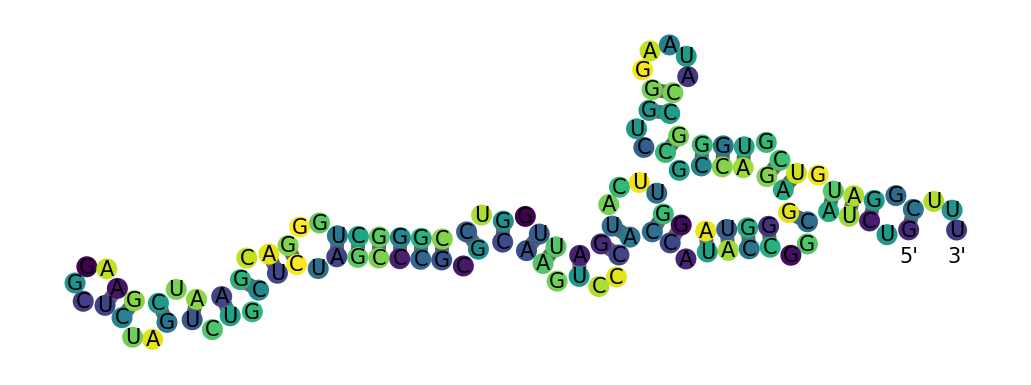

In [4]:
import subprocess
import matplotlib.pyplot as plt
from ipynb.draw import draw_struct
import numpy as np

def run_cpp_program(input_text):
    compile_process = subprocess.Popen(["g++", "rna.cpp", "-o", "output"], stderr=subprocess.PIPE)
    _, compile_error = compile_process.communicate()
    if compile_process.returncode != 0:
        print(f"Compilation Error: {compile_error.decode('utf-8')}")
        return None
    run_process = subprocess.Popen(["./output"], stdin=subprocess.PIPE, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    program_output, program_error = run_process.communicate(input=input_text.encode('utf-8'))
    if run_process.returncode != 0:
        print(f"Program Error: {program_error.decode('utf-8')}")
        return None

    return program_output.decode('utf-8')

seq = 'GUCUACGGCCAUACCACCCUGAACGCGCCCGAUCUCGUCUGAUCUCGGAAGCUAAGCAGGGUCGGGCCUGGUUAGUACUUGGAUGGGAGACCGCCUGGGAAUACCGGGUGCUGUAGGCUUU'
output = run_cpp_program(seq)

ls = output.split('\n')
struct = ls[-2].strip()

if output is not None:
    print("Program Output:")
    print(output)
draw_struct(seq, struct, c = np.random.uniform(size=len(seq)))

Program Output:

The maximum number of base pair matchings is: 44

The matchings are (0 based indexing): 
G(24)--C(29)
U(23)--A(30)
G(45)--C(50)
C(44)--G(51)
C(43)--G(52)
U(42)--A(53)
U(41)--A(54)
G(64)--C(69)
C(63)--G(70)
G(62)--C(71)
C(61)--G(73)
A(59)--U(75)
A(58)--U(78)
U(56)--A(79)
G(55)--C(80)
A(40)--U(81)
C(39)--G(82)
C(38)--G(83)
C(37)--G(84)
G(34)--C(85)
C(33)--G(86)
C(32)--G(87)
C(31)--G(88)
G(22)--C(89)
C(21)--G(90)
G(20)--C(92)
G(19)--C(93)
C(18)--G(94)
G(17)--C(95)
U(97)--A(103)
C(96)--G(104)
A(16)--U(105)
U(15)--A(106)
A(14)--U(109)
C(13)--G(111)
C(12)--G(112)
C(11)--G(114)
G(8)--C(115)
C(7)--G(116)
C(6)--G(117)
C(5)--G(118)
C(4)--G(119)
C(3)--G(120)
U(2)--A(121)

Dot bracket notation: 
..(((((((..((((((((((((((....))((((..(((((((((....)))))((.((.((((....))).).)..))))))))))))).))))((.....))))..).)).))))))))



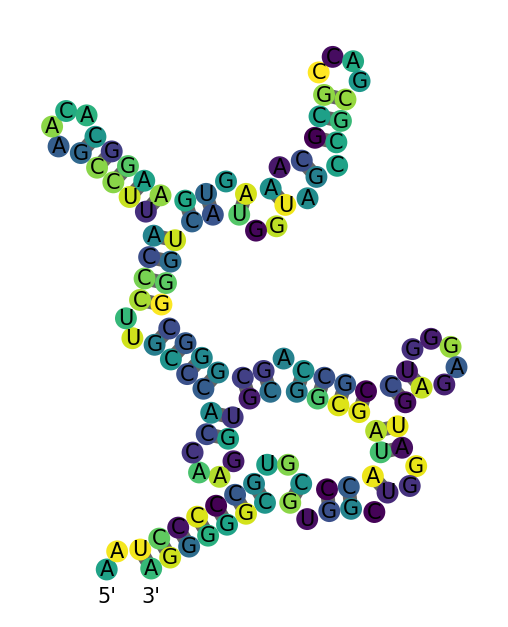

In [5]:
#Thermus thermophilus 5S rRNA
seq  = 'AAUCCCCCGUGCCCAUAGCGGCGUGGAACCACCCGUUCCCAUUCCGAACACGGAAGUGAAACGCGCCAGCGCCGAUGGUACUGGGCGGGCGACCGCCUGGGAGAGUAGGUCGGUGCGGGGGA'
output = run_cpp_program(seq)

ls = output.split('\n')
struct = ls[-2].strip()

if output is not None:
    print("Program Output:")
    print(output)
draw_struct(seq, struct, c = np.random.uniform(size=len(seq)))

Program Output:

The maximum number of base pair matchings is: 42

The matchings are (0 based indexing): 
C(10)--G(15)
G(9)--C(16)
G(8)--C(18)
C(7)--G(19)
U(47)--A(52)
C(46)--G(53)
A(44)--U(54)
C(61)--G(66)
G(60)--C(67)
C(59)--G(68)
G(55)--C(69)
G(43)--C(70)
C(41)--G(71)
U(39)--A(72)
A(38)--U(73)
C(36)--G(74)
C(35)--G(75)
C(34)--G(78)
G(84)--C(89)
G(83)--C(90)
G(82)--C(91)
G(80)--C(92)
U(79)--A(93)
A(33)--U(94)
G(32)--C(96)
U(31)--A(98)
C(30)--G(99)
C(29)--G(101)
A(28)--U(102)
C(27)--G(104)
C(26)--G(105)
C(25)--G(106)
U(24)--A(107)
U(21)--A(108)
G(20)--C(109)
G(6)--C(112)
G(5)--C(113)
U(4)--A(114)
C(3)--G(115)
C(2)--G(116)
G(1)--C(117)
U(0)--A(118)

Dot bracket notation: 
(((((((((((....)).))((..(((((((((((((.((.(.((.((....)))(...(((....))))))))))..)((.(((....)))))).).)).)).))))))..))))))).



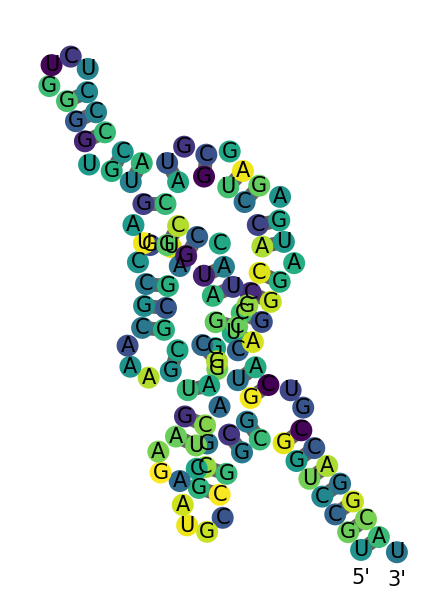

In [6]:
#5S ribosomal RNA from Escherichia coli str. K-12 substr. MG1655 (PDB 7BL5, chain B)
seq = 'UGCCUGGCGGCCGUAGCGCGGUGGUCCCACCUGACCCCAUGCCGAACUCAGAAGUGAAACGCCGUAGCGCCGAUGGUAGUGUGGGGUCUCCCCAUGCGAGAGUAGGGAACUGCCAGGCAU'
output = run_cpp_program(seq)

ls = output.split('\n')
struct = ls[-2].strip()

if output is not None:
    print("Program Output:")
    print(output)
draw_struct(seq, struct, c = np.random.uniform(size=len(seq)))

Program Output:

The maximum number of base pair matchings is: 55

The matchings are (0 based indexing): 
A(31)--U(37)
G(30)--C(39)
A(29)--U(40)
G(28)--C(42)
G(27)--C(43)
C(87)--G(92)
C(84)--G(93)
A(82)--U(94)
C(81)--G(95)
U(80)--A(96)
A(78)--U(97)
A(77)--U(98)
A(75)--U(99)
A(73)--U(100)
A(72)--U(101)
U(70)--A(102)
U(66)--A(103)
A(64)--U(104)
C(62)--G(105)
G(61)--C(106)
C(60)--G(108)
G(58)--C(109)
A(55)--U(110)
C(54)--G(111)
C(53)--G(112)
U(52)--A(113)
G(51)--C(116)
A(49)--U(117)
A(48)--U(118)
A(47)--U(120)
A(46)--U(123)
A(45)--U(125)
C(44)--G(126)
U(26)--A(129)
A(25)--U(130)
U(24)--A(131)
G(23)--C(132)
U(22)--A(133)
C(20)--G(134)
C(18)--G(136)
G(16)--C(137)
A(15)--U(138)
U(13)--A(139)
G(12)--C(143)
G(11)--C(145)
A(10)--U(146)
U(8)--A(147)
G(7)--C(148)
C(6)--G(149)
U(5)--A(150)
U(4)--A(154)
C(3)--G(156)
G(2)--C(157)
G(1)--C(158)
G(0)--C(159)

Dot bracket notation: 
(((((((((.((((.((.(.(.((((((((((.....).)).))((((((.(((((..(.(((.(.(...(.((.(.((.(((.(..(....))))))))))))))).))))))..))).).

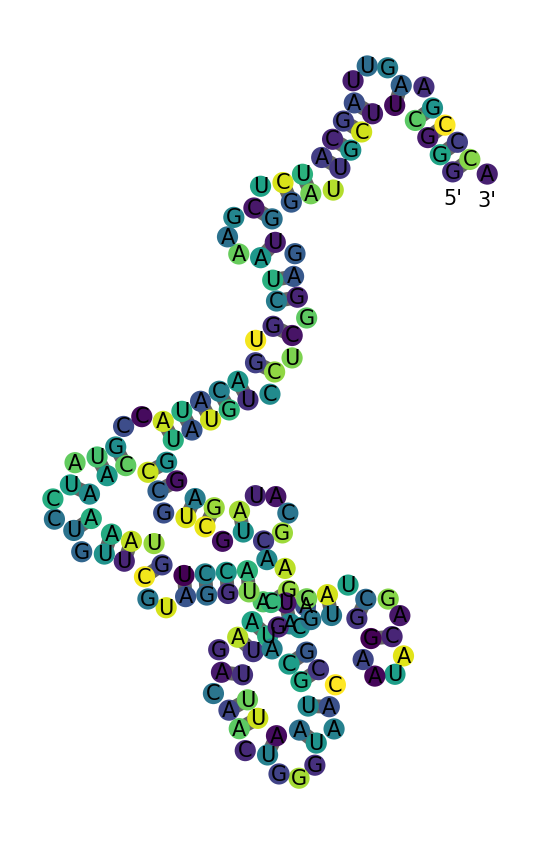

In [7]:
#synthetic construct M-box riboswitch (ykoK leader)
seq = 'GGGCUUCGUUAGGUGAGGCUCCUGUAUGGAGAUACGCUGCUGCCCAAAAAUGUCCAAAGACGCCAAUGGGUCAACAGAAAUCAUCGACAUAAGGUGAUUUUUAAUGCAGCUGGAUGCUUGUCCUAUGCCAUACAGUGCUAAAGCUCUACGAUUGAAGCCCA'
output = run_cpp_program(seq)

ls = output.split('\n')
struct = ls[-2].strip()

if output is not None:
    print("Program Output:")
    print(output)
draw_struct(seq, struct, c = np.random.uniform(size=len(seq)))

Program Output:

The maximum number of base pair matchings is: 40

The matchings are (0 based indexing): 
U(44)--A(49)
C(43)--G(50)
G(40)--C(51)
U(39)--A(53)
U(37)--A(54)
C(35)--G(55)
U(34)--A(57)
C(33)--G(58)
A(31)--U(61)
G(30)--C(62)
C(29)--G(63)
C(28)--G(64)
C(27)--G(65)
G(26)--C(66)
G(24)--C(67)
C(23)--G(69)
A(22)--U(71)
A(21)--U(72)
U(19)--A(73)
C(16)--G(74)
A(15)--U(75)
C(14)--G(80)
C(13)--G(81)
U(11)--A(82)
A(10)--U(83)
C(9)--G(84)
C(8)--G(85)
C(5)--G(86)
G(97)--C(103)
G(96)--C(104)
C(93)--G(105)
C(91)--G(106)
C(90)--G(107)
A(89)--U(108)
G(88)--C(110)
A(87)--U(111)
A(4)--U(113)
U(3)--A(114)
C(2)--G(115)
G(0)--C(117)

Dot bracket notation: 
(.((((..((((.((((..(.((((.((((((.(((.(.((..((....))).))).))..))))))).).)))))....)))))))(((((.(..((.....)))))).)).))).)...



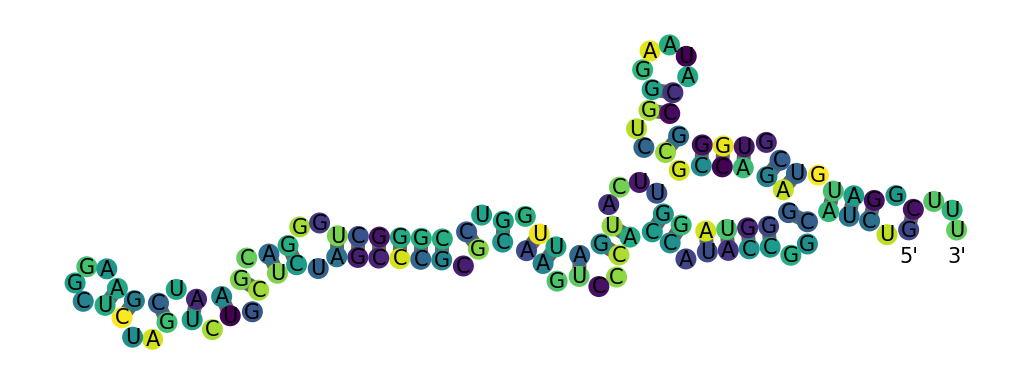

In [8]:
#	Homo sapiens (human) RNA, 5S ribosomal 1 (RNA5S1-8, RNA5S10-17)
seq = 'GUCUACGGCCAUACCACCCUGAACGCGCCCGAUCUCGUCUGAUCUCGGAAGCUAAGCAGGGUCGGGCCUGGUUAGUACUUGGAUGGGAGACCGCCUGGGAAUACCGGGUGCUGUAGGCUUU'
output = run_cpp_program(seq)

ls = output.split('\n')
struct = ls[-2].strip()

if output is not None:
    print("Program Output:")
    print(output)
draw_struct(seq, struct, c = np.random.uniform(size=len(seq)))

Program Output:

The maximum number of base pair matchings is: 75

The matchings are (0 based indexing): 
A(44)--U(49)
G(43)--C(50)
A(42)--U(51)
G(41)--C(52)
A(40)--U(53)
C(38)--G(54)
U(36)--A(55)
U(35)--A(56)
G(89)--C(94)
A(88)--U(96)
A(86)--U(97)
A(84)--U(98)
A(83)--U(99)
G(81)--C(100)
A(80)--U(101)
G(79)--C(102)
A(77)--U(104)
C(108)--G(114)
G(107)--C(115)
G(105)--C(116)
C(76)--G(117)
C(75)--G(118)
A(73)--U(120)
A(72)--U(121)
A(71)--U(122)
G(70)--C(123)
C(69)--G(125)
C(68)--G(126)
C(132)--G(139)
G(131)--C(140)
U(130)--A(141)
U(129)--A(142)
G(128)--C(143)
A(67)--U(144)
C(66)--G(145)
G(65)--C(146)
G(63)--C(147)
A(62)--U(149)
G(60)--C(150)
U(59)--A(151)
C(57)--G(152)
G(34)--C(153)
G(32)--C(154)
U(31)--A(155)
A(29)--U(156)
A(27)--U(157)
C(25)--G(158)
U(22)--A(159)
A(21)--U(160)
C(20)--G(161)
U(19)--A(162)
A(18)--U(163)
G(17)--C(164)
U(178)--A(186)
C(176)--G(187)
C(175)--G(189)
U(174)--A(190)
C(173)--G(191)
U(172)--A(192)
C(171)--G(193)
U(170)--A(196)
U(169)--A(198)
C(168)--G(199)
U(167)-

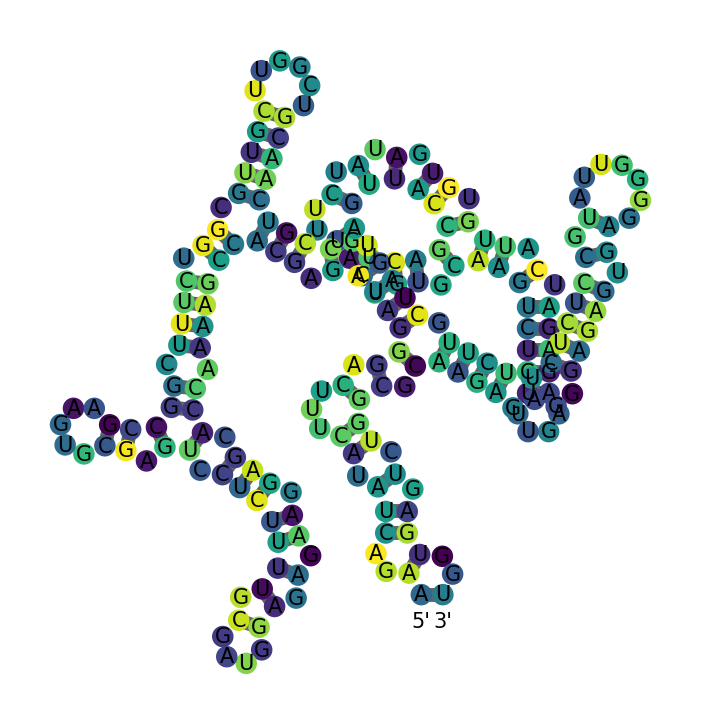

In [9]:
#Homo sapiens (human) small nucleolar RNA, C/D box 3A (SNORD3A)
seq = 'AAGACUAUACUUUCAGGGAUCAUUUCUAUAGUGUGUUACUAGAGAAGUUUCUCUGAACGUGUAGAGCACCGAAAACCACGAGGAAGAGAGGUAGCGUUUUCUCCUGAGCGUGAAGCCGGCUUUCUGGCGUUGCUUGGCUGCAACUGCCGUCAGCCAUUGAUGAUCGUUCUUCUCUCCGUAUUGGGGAGUGAGAGGGAGAGAACGCGGUCUGAGUGGU'
output = run_cpp_program(seq)

ls = output.split('\n')
struct = ls[-2].strip()

if output is not None:
    print("Program Output:")
    print(output)
draw_struct(seq, struct, c = np.random.uniform(size=len(seq)))

In [5]:
count = 0
seq = '..((((((((((.....((((((((....(((((((.............))))..)))...)))))).)).((.((....((((((((....))))))))....)).))...))))))))))'
for a in seq:
    if a == '(':
        count+=1

count

37